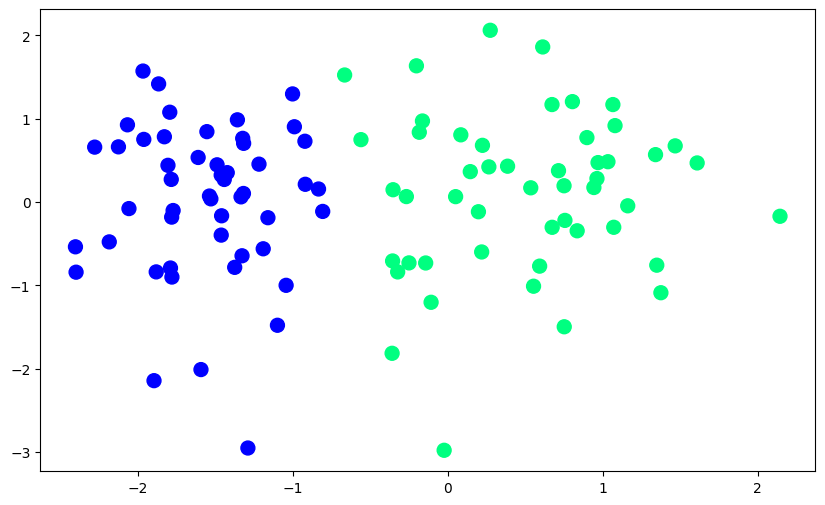

In [13]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### Gradient Descent

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='sag')
lor.fit(X,y)
print(lor.coef_)
print(lor.intercept_)

[[2.36644956 0.02188547]]
[3.13483642]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [8]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

coef_,intercept_ = gd(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

(-3.0, 2.0)

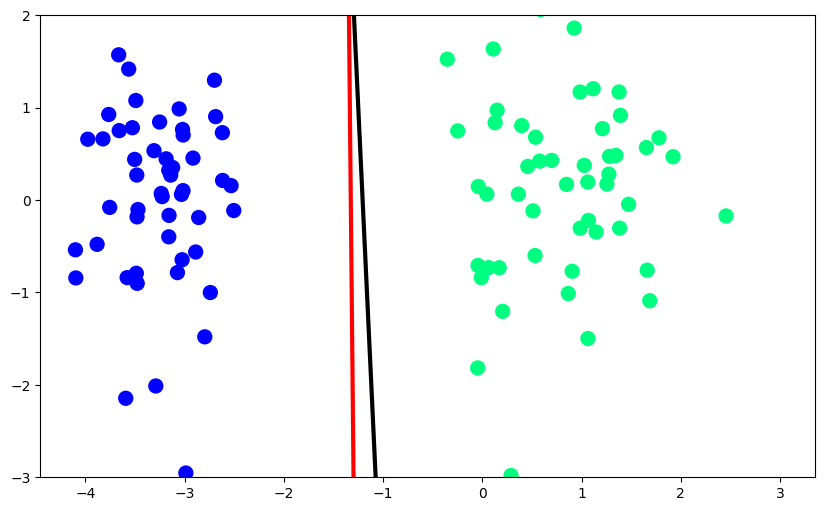

In [9]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [10]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [11]:
X1 = np.insert(X,0,1,axis=1)
np.ones(X1.shape[1])

array([1., 1., 1.])

### Perceptron Trick

[1.46381526 0.12209919]
0.9


(-3.0, 2.0)

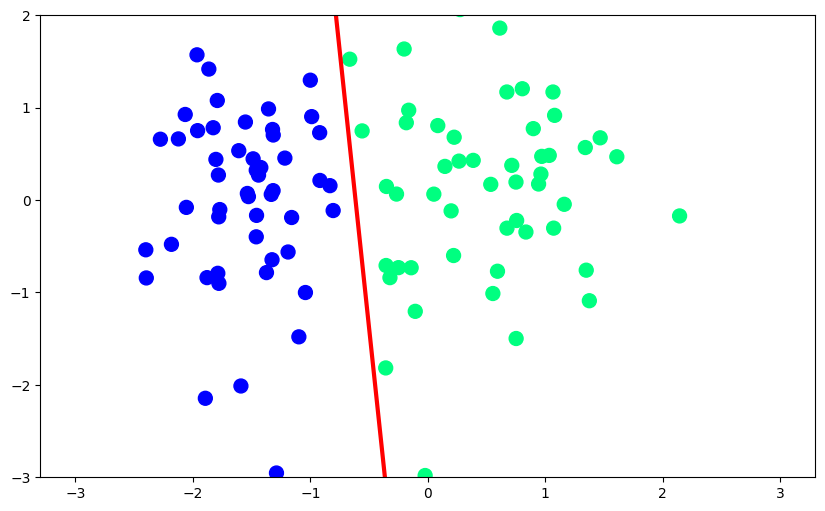

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#### Perceptron Trick with Stochastic Gradient Descent

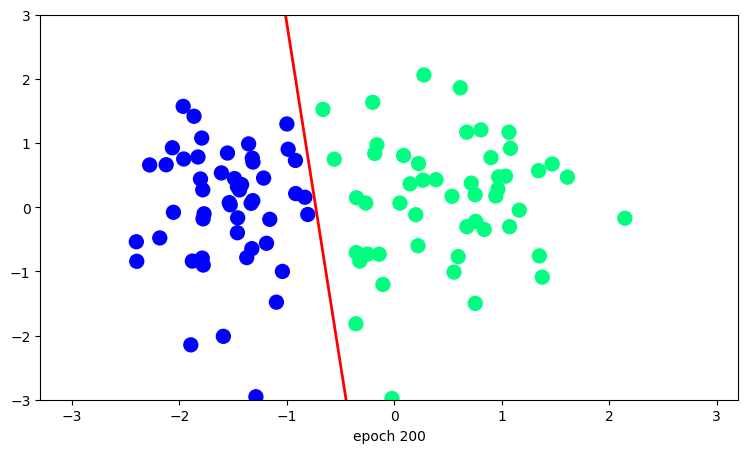

In [19]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

m,b = perceptron(X,y)

%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
HTML(anim.to_jshtml())
plt.show()

(-3.0, 2.0)

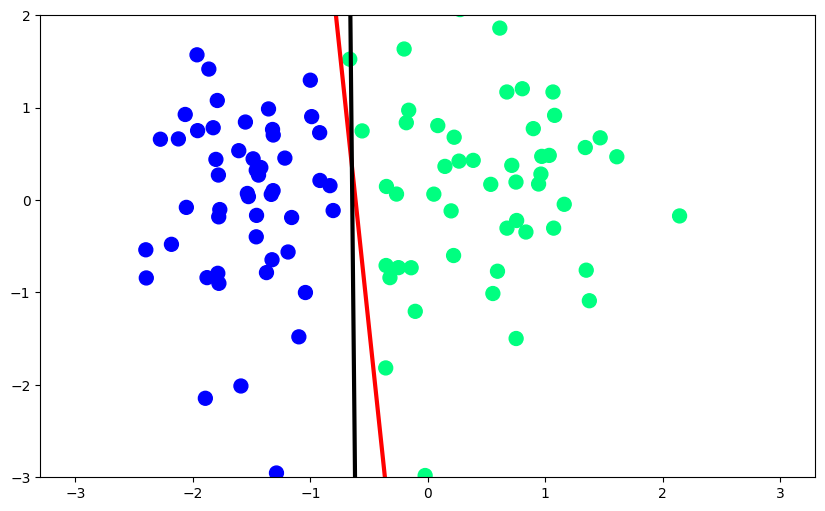

In [20]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Perceptron Trick with Sigmoid

[1.380126   0.09323334]
0.9


(-3.0, 2.0)

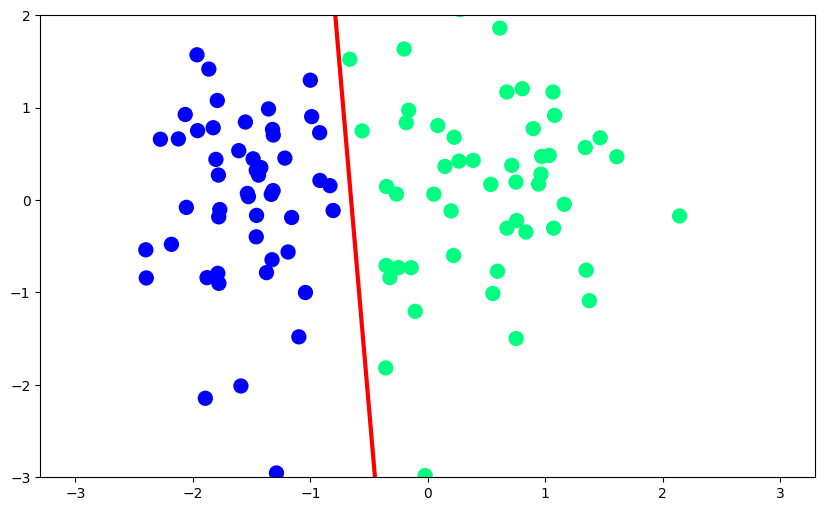

In [21]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)

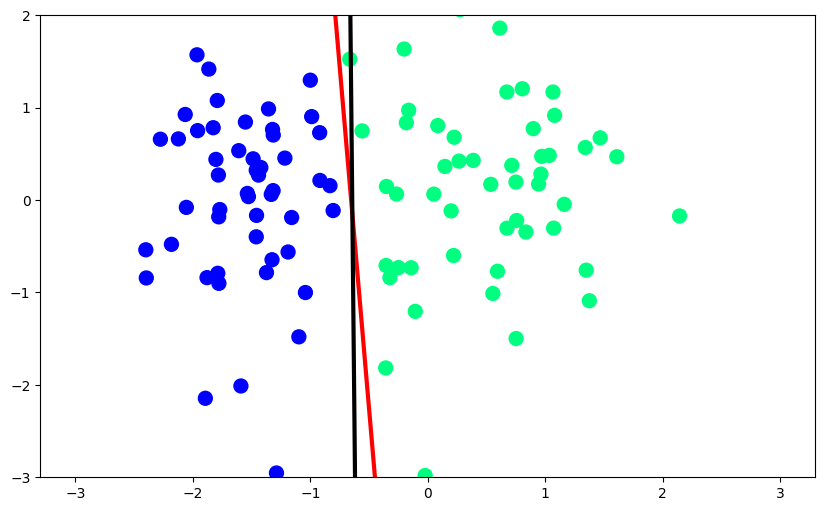

In [22]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)

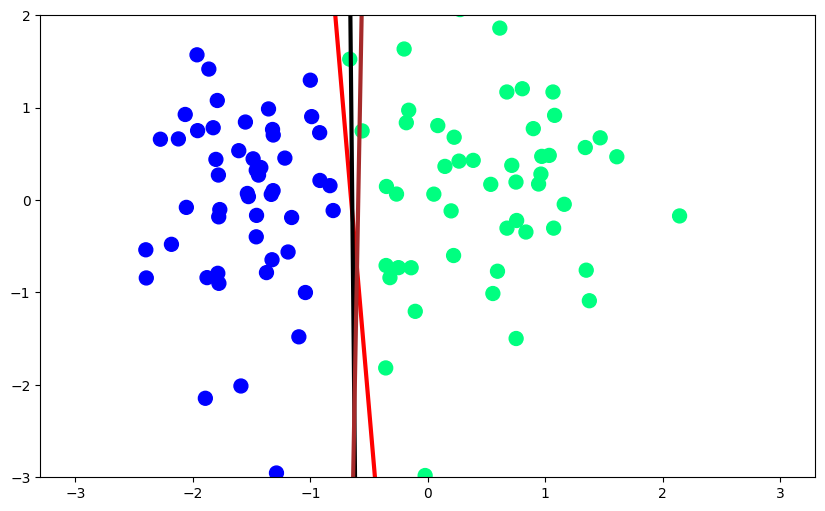

In [23]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

intercept_,coef_ = perceptron(X,y)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

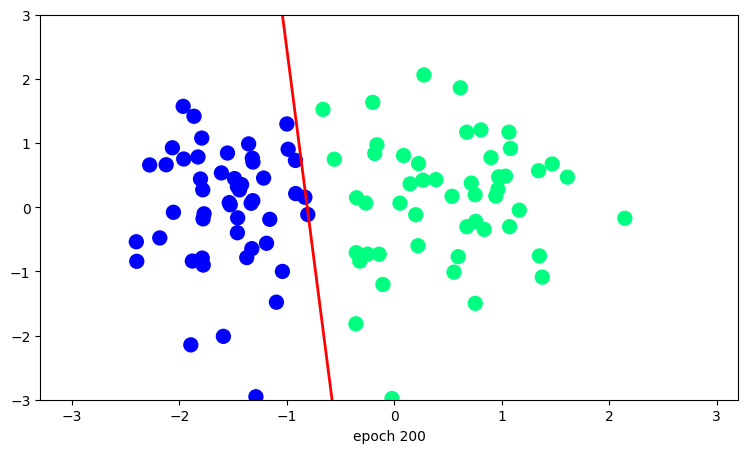

In [25]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

m,b = perceptron(X,y)

%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
HTML(anim.to_jshtml())
plt.show()